### 逻辑回归中添加多项式特征

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
X = np.random.normal(0,1,size=(200,2)) # 均值为0，标准差为1的随机序列,200个，2个特征
y = np.array(X[:,0]**2 + X[:,1]**2 < 1.5,dtype='int')

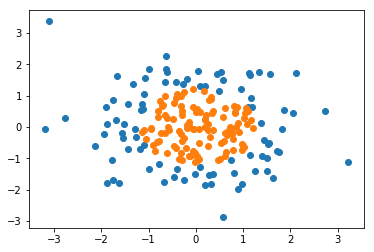

In [3]:
plt.scatter(X[y == 0,0],X[y == 0,1])
plt.scatter(X[y == 1,0],X[y == 1,1])
plt.show()

### 使用逻辑回归

In [4]:
from LogisticRegression import LogisticRegression

In [5]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [6]:
log_reg.score(X,y)

0.61

In [7]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)  # 以不同的颜色进行划分

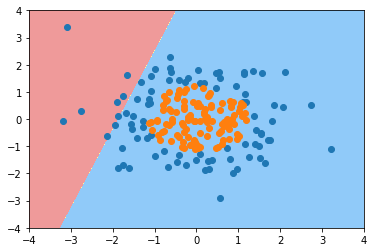

In [8]:
plot_decision_boundary(log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y == 0,0],X[y == 0,1])
plt.scatter(X[y == 1,0],X[y == 1,1])
plt.show()

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('log_reg',LogisticRegression())
    ])

In [10]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression())])

In [11]:
poly_log_reg.score(X,y)

0.97

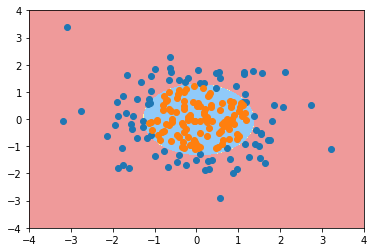

In [12]:
plot_decision_boundary(poly_log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y == 0,0],X[y == 0,1])
plt.scatter(X[y == 1,0],X[y == 1,1])
plt.show()

In [20]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X,y)

D:\jupyter\Python Folder\MachineLearning\逻辑回归\LogisticRegression.py:23: RuntimeWarning: divide by zero encountered in log
  return np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)) / len(y)
D:\jupyter\Python Folder\MachineLearning\逻辑回归\LogisticRegression.py:44: RuntimeWarning: invalid value encountered in double_scalars
  if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression())])

D:\jupyter\Python Folder\MachineLearning\逻辑回归\LogisticRegression.py:13: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-t))


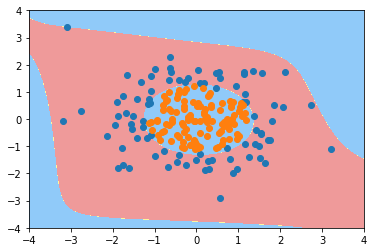

In [21]:
plot_decision_boundary(poly_log_reg2,axis=[-4,4,-4,4])
plt.scatter(X[y == 0,0],X[y == 0,1])
plt.scatter(X[y == 1,0],X[y == 1,1])
plt.show()

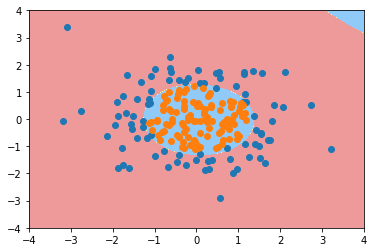

In [24]:
poly_log_reg3 = PolynomialLogisticRegression(degree=5)
poly_log_reg3.fit(X,y)

plot_decision_boundary(poly_log_reg3,axis=[-4,4,-4,4])
plt.scatter(X[y == 0,0],X[y == 0,1])
plt.scatter(X[y == 1,0],X[y == 1,1])
plt.show()